*   ベースディレクトリと、出力ディレクトリを設定します。

In [12]:
############################################
BaseDir      = 'IntroDDSJpn/Chap03/'
OutputDir    = '3L1reg-040201M2N3-L0-1/'
FileBaseName = '3L1reg-040201M2N3-L0-1'

*   Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [13]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/


*   必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [14]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib import cm
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
print('numpy      Ver.', np.__version__)
#
############################################
import sklearn as skl
import sklearn.linear_model as lm
print('sklearn    Ver.', skl.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.9.2
numpy      Ver. 1.26.4
sklearn    Ver. 1.5.2
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/3L1reg-040201M2N3-L0-1/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/3L1reg-040201M2N3-L0-1/


$M=2$, $N=3$の不良設定問題
$$
\left(
  \begin{array}{c}
    y_{1} \\
    y_{2}
  \end{array}
\right)
=
\left(
  \begin{array}{ccc}
    X_{11} & X_{12} & X_{13} \\
    X_{21} & X_{22} & X_{23}
  \end{array}
\right)
\left(
  \begin{array}{c}
    \omega_{1} \\
    \omega_{2} \\
    \omega_{3}
  \end{array}
\right)
$$

$M=2$, $N=3$の不良設定問題の例
$$
\underbrace{
  \left(
    \begin{array}{c}
      -2 \\
      3
    \end{array}
  \right)
}_{\boldsymbol{y}}
=
\underbrace{
  \left(
    \begin{array}{ccc}
      2  &  -1 & 3 \\
      -1 &  1  & 2
    \end{array}
  \right)
}_{\mathbf{X}}
\underbrace{
  \left(
    \begin{array}{c}
      \omega_{1} \\
      \omega_{2} \\
      \omega_{3}
    \end{array}
  \right)
}_{\boldsymbol{\omega}}
$$

In [15]:
############################################
y_data = np.array( [-2, 3] )
#
X_mat = np.array( [ [2, -1, 3], [-1, 1, 2] ] )

解く連立方程式

$$
-2 = 2\,\omega_{1} - \omega_{2} + 3\,\,\omega_{3}
,\,\,\, \cdots (a)
$$

$$
3 = -\omega_{1} + \omega_{2} + 2\,\,\omega_{3}
,\,\,\,\,\,\,\, \cdots (b)
$$

* $(a)+2(b)$

$$
4 = \omega_{2} + 7\,\omega_{3},
\quad
\omega_{3}
=
\frac{4-\omega_{2}}{7},
\quad
\omega_{2}
=
4-7\,\omega_{3}
\quad
\cdots(c)
$$

* $(a)+(b)$

$$
1 = \omega_{1}+5\,\omega_{3},
\quad
\omega_{3}
=
\frac{1-\omega_{1}}{5},
\quad
\omega_{1} = 1 - 5\,\omega_{3}
\quad
\cdots(d)
$$

(a), (b)の連立方程式は次式の直線を表し、直線上のすべての$\boldsymbol{\omega}$は、$\boldsymbol{y}=\mathbf{X}\,\boldsymbol{\omega}$の関係を満たす。

$$
\frac{4-\omega_{2}}{7}
=
\frac{1-\omega_{1}}{5}
=
\omega_{3}
$$

1-1.   L0=1となる解: $\omega_{1}\not=0$, $\omega_{2}=0$, $\omega_{3}=0$

$$
\underbrace{
  \left(
    \begin{array}{c}
      y_{1} \\
      y_{2}
    \end{array}
  \right)
}_{\boldsymbol{y}}
=
\underbrace{
  \left(
    \begin{array}{c}
      X_{11} \\
      X_{21}
    \end{array}
  \right)
}_{\mathbf{X}_{1}}
\left(
  \begin{array}{c}
    \omega_{1}
  \end{array}
\right)
$$

$$
\hat{\omega}_{1}
=
\left(\mathbf{X}_{1}^{\intercal}\mathbf{X}_{1}\right)^{-1}
\mathbf{X}_{1}^{\intercal}
\boldsymbol{y}
$$

  * 但し、$\mathbf{X}_{1}^{\intercal}\mathbf{X}_{1}$はスカラー

In [16]:
############################################
M = 2
#
X1_mat = X_mat[:,0]
#
# X1_mat   <- 2行1列
# X1_mat.T <- 1行2列
# X1_mat.T @ X1_mat <- 1行2列 @ 2行1列 = 1行1列 (スカラー)
# よって逆行列としてスカラーの逆数を用いる
X1_inv = 1 / (X1_mat.T @ X1_mat) * X1_mat.T
omega1_hat =  np.array( X1_inv @ y_data  )
print( 'omega1 = ', omega1_hat )
#
y1_reg = X1_mat * omega1_hat
print( 'y1_reg = ', y1_reg )
print( 'y_data = ', y_data )
#
y1_err = np.sum( (y_data - y1_reg)**2 ) / (2*M)
#
print( 'y1_err = ', y1_err )

omega1 =  -1.4000000000000001
y1_reg =  [-2.8  1.4]
y_data =  [-2  3]
y1_err =  0.8


1-2.   L0=1となる解: $\omega_{1}=0$, $\omega_{2}\not=0$, $\omega_{3}=0$ の解

$$
\underbrace{
  \left(
    \begin{array}{c}
      y_{1} \\
      y_{2}
    \end{array}
  \right)
}_{\boldsymbol{y}}
=
\underbrace{
  \left(
    \begin{array}{c}
      X_{12} \\
      X_{22}
    \end{array}
  \right)
}_{\mathbf{X}_{2}}
\left(
  \begin{array}{c}
    \omega_{2}
  \end{array}
\right)
$$

$$
\hat{\omega}_{2}
=
\left(\mathbf{X}_{2}^{\intercal}\mathbf{X}_{2}\right)^{-1}
\mathbf{X}_{2}^{\intercal}
\boldsymbol{y}
$$

  * 但し、$\mathbf{X}_{2}^{\intercal}\mathbf{X}_{2}$はスカラー

In [17]:
############################################
M = 2
#
X2_mat = X_mat[:,1]
#
# X2_mat   <- 2行1列
# X2_mat.T <- 1行2列
# X2_mat.T @ X2_mat <- 1行2列 @ 2行1列 = 1行1列 (スカラー)
# よって逆行列としてスカラーの逆数を用いる
X2_inv = 1 / (X2_mat.T @ X2_mat) * X2_mat.T
omega2_hat =  np.array( X2_inv @ y_data  )
print( 'omega2 = ', omega2_hat )
#
y2_reg = X2_mat * omega2_hat
print( 'y2_reg = ', y2_reg )
print( 'y_data = ', y_data )
#
y2_err = np.sum( (y_data - y2_reg)**2 ) / (2*M)
#
print( 'y2_err = ', y2_err )

omega2 =  2.5
y2_reg =  [-2.5  2.5]
y_data =  [-2  3]
y2_err =  0.125


1-3.   L0=1となる解:  $\omega_{1}=0$, $\omega_{2}=0$, $\omega_{3}\not=0$ の解

$$
\underbrace{
  \left(
    \begin{array}{c}
      y_{1} \\
      y_{2}
    \end{array}
  \right)
}_{\boldsymbol{y}}
=
\underbrace{
  \left(
    \begin{array}{c}
      X_{13} \\
      X_{23}
    \end{array}
  \right)
}_{\mathbf{X}_{3}}
\left(
  \begin{array}{c}
    \omega_{3}
  \end{array}
\right)
$$


$$
\hat{\omega}_{3}
=
\left(\mathbf{X}_{3}^{\intercal}\mathbf{X}_{3}\right)^{-1}
\mathbf{X}_{3}^{\intercal}
\boldsymbol{y}
$$

  * 但し、$\mathbf{X}_{3}^{\intercal}\mathbf{X}_{3}$はスカラー

In [18]:
############################################
M = 2
#
X3_mat = X_mat[:,2]
#
# X3_mat   <- 2行1列
# X3_mat.T <- 1行2列
# X3_mat.T @ X3_mat <- 1行2列 @ 2行1列 = 1行1列 (スカラー)
# よって逆行列としてスカラーの逆数を用いる
X3_inv = 1 / (X3_mat.T @ X3_mat) * X3_mat.T
omega3_hat =  np.array( X3_inv @ y_data  )
print( 'omega3 = ', omega3_hat )
#
y3_reg = X3_mat * omega3_hat
print( 'y3_reg = ', y3_reg )
print( 'y_data = ', y_data )
#
y3_err = np.sum( (y_data - y3_reg)**2 ) / (2*M)
#
print( 'y3_err = ', y3_err )

omega3 =  0.0
y3_reg =  [0. 0.]
y_data =  [-2  3]
y3_err =  3.25


グラフを描く準備1

* $\omega_{1}$, $\omega_{2}$, $\omega_{3}$ の表示範囲

In [19]:
############################################
omega1_width = 3.0 # 2.0
#
omega1s = np.linspace( omega1_hat - omega1_width, omega1_hat + omega1_width, num = 100 )
omega1s = np.append( omega1s, 0.0 )
omega1s = np.sort( omega1s )
#
############################################
omega2_width = 3.0
#
omega2s = np.linspace( omega2_hat - omega2_width, omega2_hat + omega2_width, num = 100 )
omega2s = np.append( omega2s, 0.0 )
omega2s = np.sort( omega2s )
#
############################################
omega3_width = 3.0 # 1.0
#
omega3s = np.linspace( omega3_hat - omega3_width, omega3_hat + omega3_width, num = 100 )
omega3s = np.append( omega3s, 0.0 )
omega3s = np.sort( omega3s )

グラフを描く準備2

* $\frac{1}{2M}\|\boldsymbol{y}-\mathbf{X}_{n}\,\boldsymbol{\omega}_{n}\|_{2}^{2}$

In [20]:
############################################
y1s_E = np.zeros_like( omega1s )
#
idx_ = 0
for omega1_ in omega1s:
  y1s_E[ idx_ ] = np.sum( (X1_mat * omega1_ - y_data)**2 ) / (2*M)
  idx_ = idx_ + 1
#
############################################
y2s_E = np.zeros_like( omega2s )
#
idx_ = 0
for omega2_ in omega2s:
  y2s_E[ idx_ ] = np.sum( (X2_mat * omega2_ - y_data)**2 ) / (2*M)
  idx_ = idx_ + 1
#
############################################
y3s_E = np.zeros_like( omega3s )
#
idx_ = 0
for omega3_ in omega3s:
  y3s_E[ idx_ ] = np.sum( (X3_mat * omega3_ - y_data)**2 ) / (2*M)
  idx_ = idx_ + 1
#

In [21]:
############################################
grf_y_top = 10.0
grf_y_bot = -1.0
############################################
def Grf_L0_1_case( alpha ):
  #
  plt.rcParams["font.size"] = 16
  #
  fig = plt.figure( figsize=(18,6) )
  #
  fig.subplots_adjust(left=0.05, right=0.99, top=0.9, bottom=0.15, wspace=0.30)
  #
  #
  ###########
  # omega_1
  ax1 = fig.add_subplot(1,3,1, title=r'$\omega_{1}\ne0, \omega_{2}=0, \omega_{3}=0: \alpha=%.3f$' % alpha )
  ax1.set_xlabel( r'$\omega_{1}$'    )
  ax1.set_ylabel( r'$E(\omega_{1})$' )
  ax1.set_ylim( grf_y_bot, grf_y_top )
  ax1.axvline( 0.0, linestyle='dashed', color='black' )
  ax1.axhline( 0.0, linestyle='dashed', color='black' )
  #
  # LSQM
  ax1.plot( omega1s, y1s_E, label=r'$\frac{1}{2M}\|{\bf y}-{\bf X}_{1}\omega_{1}\|_{2}^{2}$', color='red' )
  ax1.axvline( omega1_hat, linestyle='dashed', color='red' )
  #
  # L1 norm
  y1s_L1 = alpha * np.abs( omega1s )
  ax1.plot( omega1s, y1s_L1, label=r'$\alpha\|\omega_{1}\|_{1}$', color='green' )
  #
  # Lasso
  y1s_Lasso = y1s_E + y1s_L1
  ax1.plot( omega1s, y1s_Lasso, label=r'$\frac{1}{2M}\|{\bf y}-{\bf X}_{1}\omega_{1}\|_{2}^{2}+\alpha\|\omega_{1}\|_{1}$', color='blue' )
  omega1_min_ = omega1s[ np.argmin( y1s_Lasso ) ]
  if omega1_min_ == 0.0:
    ax1.axvline( omega1_min_, linestyle='dashed', color='blue' )
  else:
    ax1.axvline( omega1_min_, linestyle='dashed', color='blue', label=r'$\omega_{1}\ne0$' )
  #
  plt.legend( fontsize=12 )
  #
  ###########
  # omega_2
  ax2 = fig.add_subplot(1,3,2, title=r'$\omega_{1}=0, \omega_{2}\ne0, \omega_{3}=0: \alpha=%.3f$' % alpha )
  ax2.set_xlabel( r'$\omega_{2}$'    )
  ax2.set_ylabel( r'$E(\omega_{2})$' )
  ax2.set_ylim( grf_y_bot, grf_y_top )
  ax2.axvline( 0.0, linestyle='dashed', color='black' )
  ax2.axhline( 0.0, linestyle='dashed', color='black' )
  #
  # LSQM
  ax2.plot( omega2s, y2s_E, label=r'$\frac{1}{2M}\|{\bf y}-{\bf X}_{2}\omega_{2}\|_{2}^{2}$', color='red' )
  ax2.axvline( omega2_hat, linestyle='dashed', color='red' )
  #
  # L1 norm
  y2s_L1 = alpha * np.abs( omega2s )
  ax2.plot( omega2s, y2s_L1, label=r'$\alpha\|\omega_{2}\|_{1}$', color='green' )
  #
  # Lasso
  y2s_Lasso = y2s_E + y2s_L1
  ax2.plot( omega2s, y2s_Lasso, label=r'$\frac{1}{2M}\|{\bf y}-{\bf X}_{2}\omega_{2}\|_{2}^{2}+\alpha\|\omega_{2}\|_{2}$', color='blue' )
  omega2_min_ = omega2s[ np.argmin( y2s_Lasso ) ]
  if omega2_min_ == 0.0:
    ax2.axvline( omega2_min_, linestyle='dashed', color='blue' )
  else:
    ax2.axvline( omega2_min_, linestyle='dashed', color='blue', label=r'$\omega_{2}\ne0$' )
  #
  plt.legend( fontsize=12 )
  #
  ###########
  # omega_3
  ax3 = fig.add_subplot(1,3,3, title=r'$\omega_{1}=0, \omega_{2}=0, \omega_{3}\ne0: \alpha=%.3f$' % alpha )
  ax3.set_xlabel( r'$\omega_{3}$'    )
  ax3.set_ylabel( r'$E(\omega_{3})$' )
  ax3.set_ylim( grf_y_bot, grf_y_top )
  ax3.axvline( 0.0, linestyle='dashed', color='black' )
  ax3.axhline( 0.0, linestyle='dashed', color='black' )
  #
  # LSQM
  ax3.plot( omega3s, y3s_E, label=r'$\frac{1}{2M}\|{\bf y}-{\bf X}_{3}\omega_{3}\|_{2}^{2}$', color='red' )
  ax3.axvline( omega3_hat, linestyle='dashed', color='red' )
  #
  # L1 norm
  y3s_L1 = alpha * np.abs( omega3s )
  ax3.plot( omega3s, y3s_L1, label=r'$\|\omega_{3}\|_{1}$', color='green' )
  #
  # Lasso
  y3s_Lasso = y3s_E + y3s_L1
  ax3.plot( omega3s, y3s_Lasso, label=r'$\frac{1}{2M}\|{\bf y}-{\bf X}_{3}\omega_{3}\|_{2}^{2}+\alpha\|\omega_{3}\|_{2}$', color='blue' )
  omega3_min_ = omega3s[ np.argmin( y3s_Lasso ) ]
  if omega3_min_ == 0.0:
    ax3.axvline( omega3_min_, linestyle='dashed', color='blue' )
  else:
    ax3.axvline( omega3_min_, linestyle='dashed', color='blue', label=r'$\omega_{3}\ne0$' )
  #
  plt.legend( fontsize=12 )
  #
  #
  plt.show()
  #
  return fig

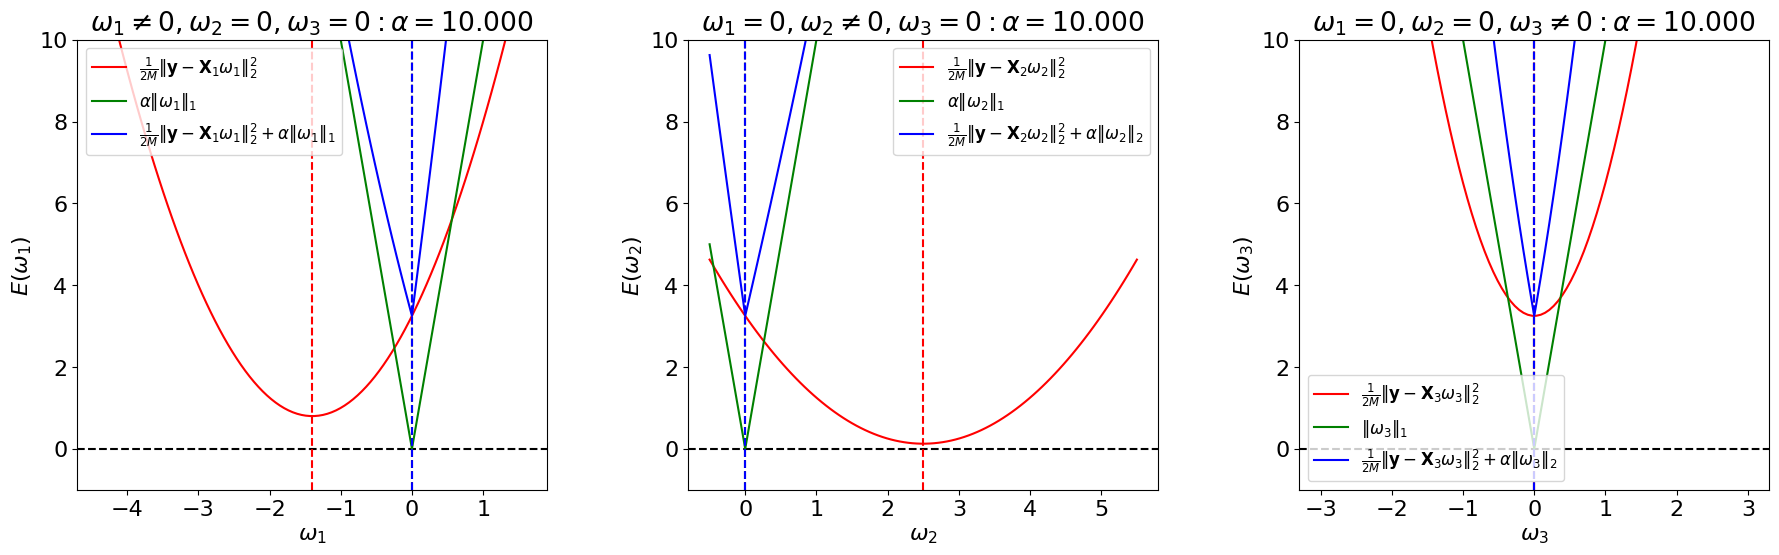

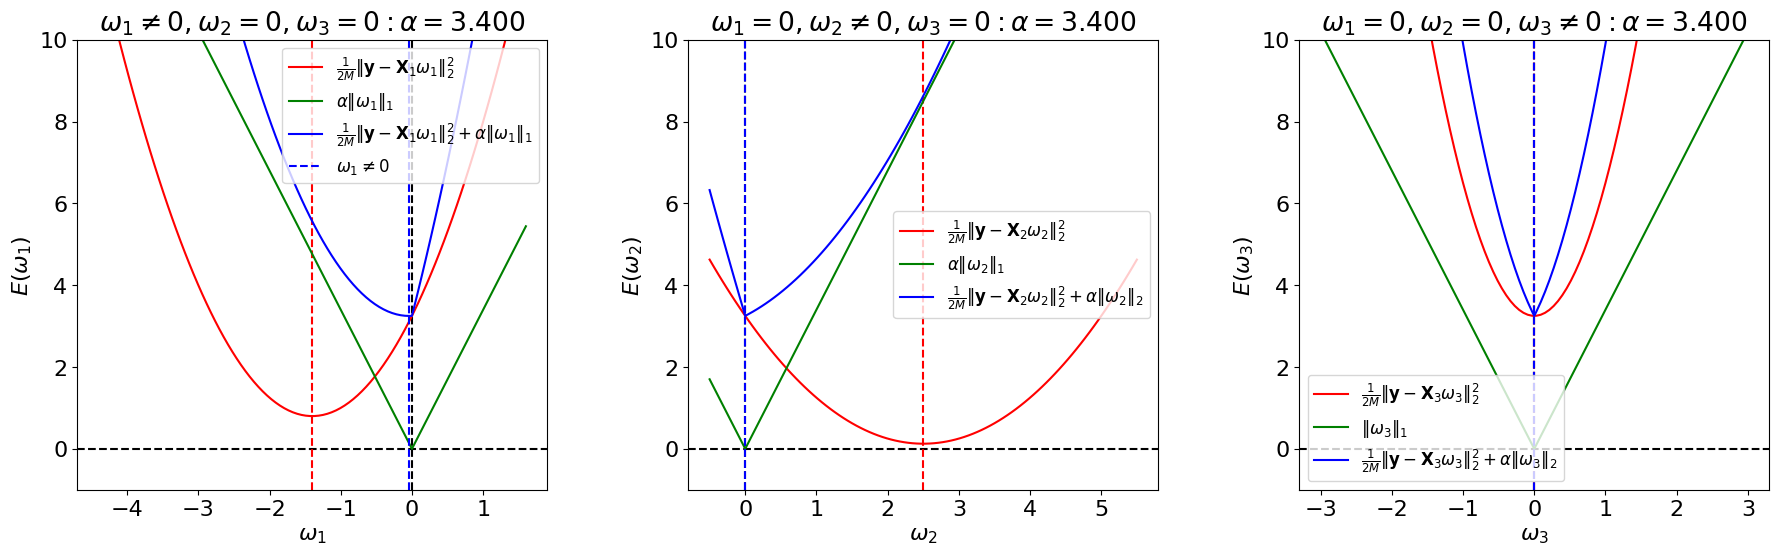

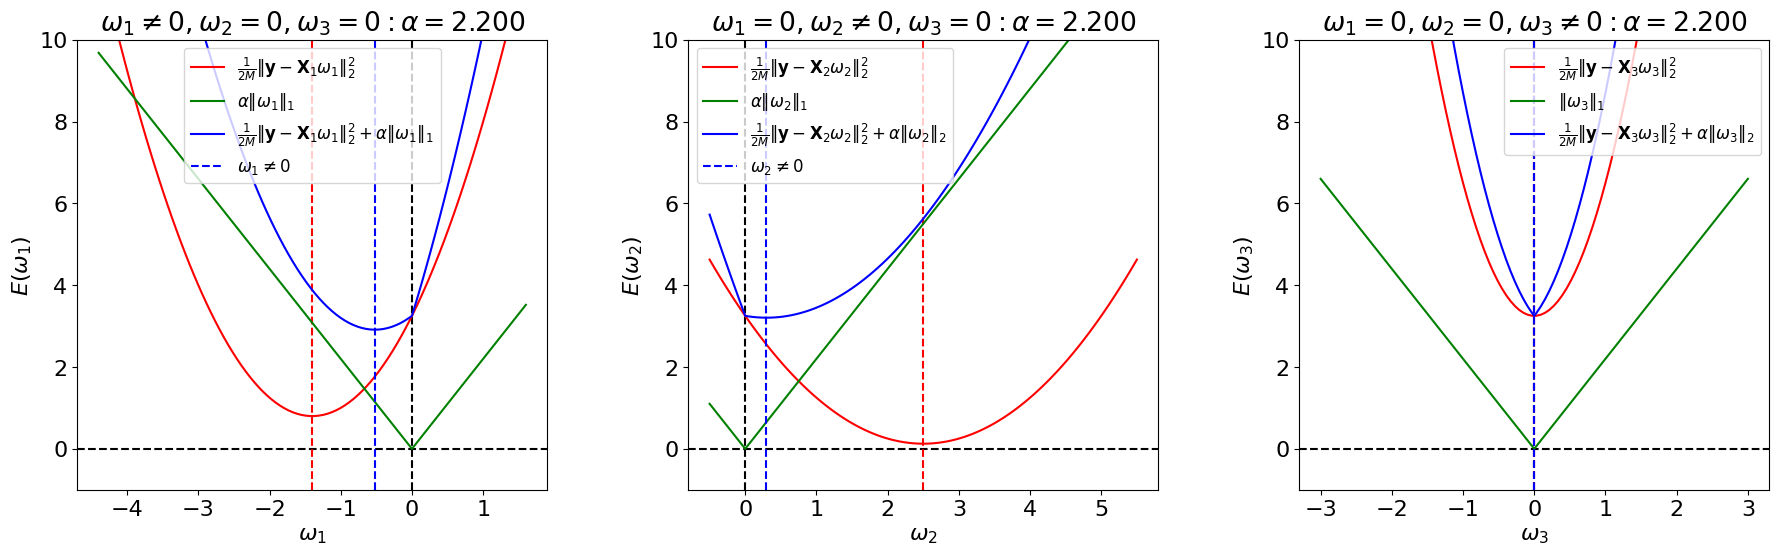

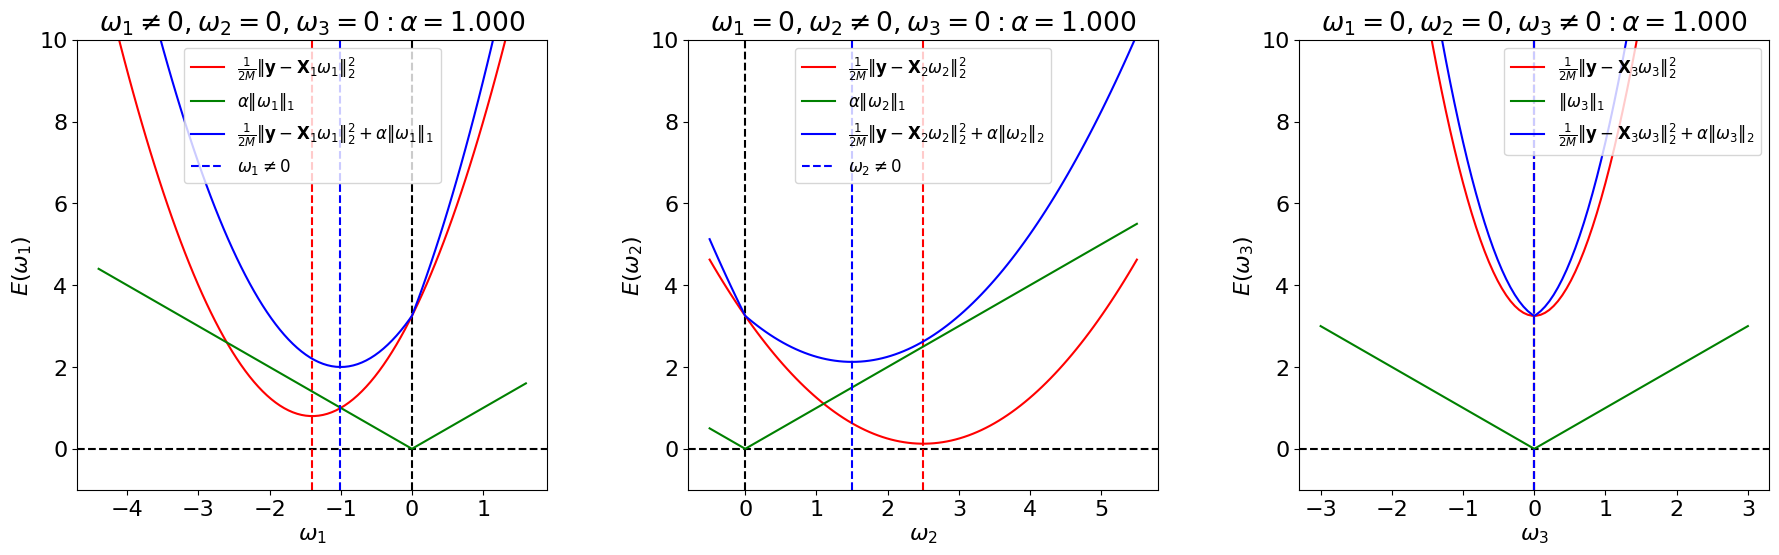

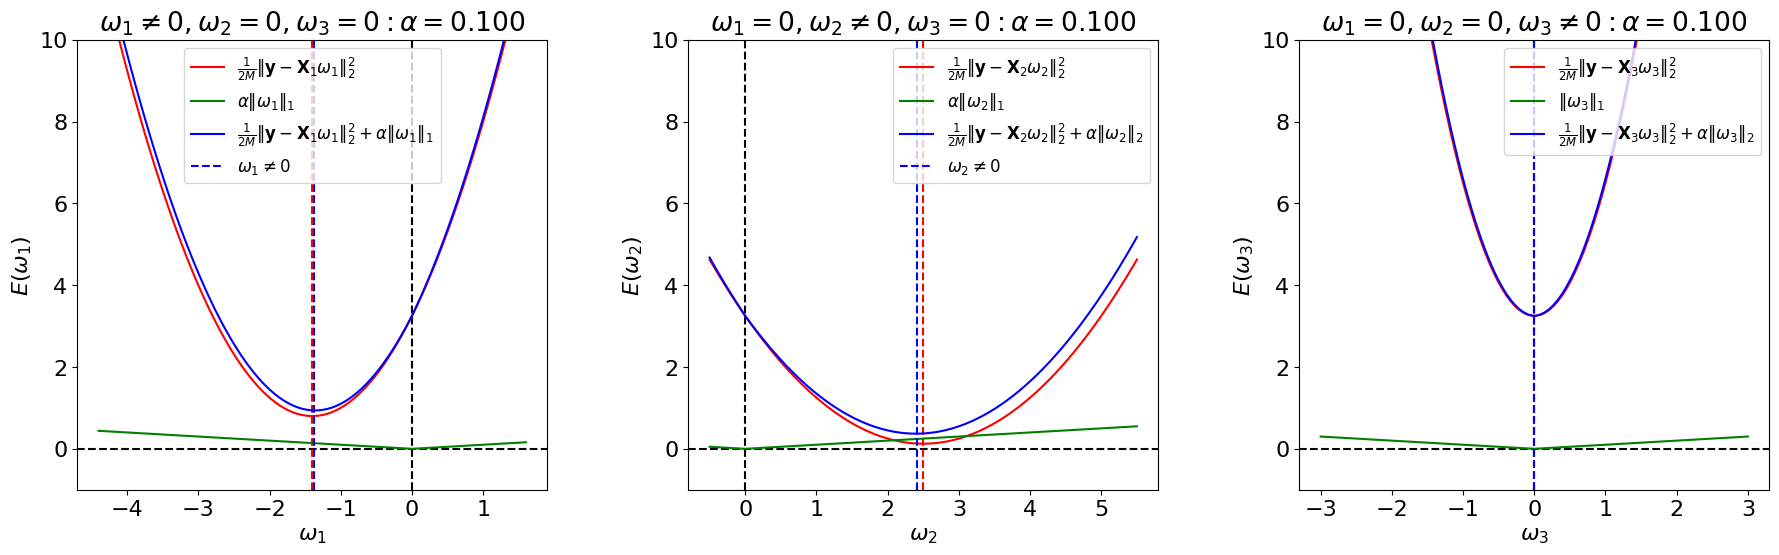

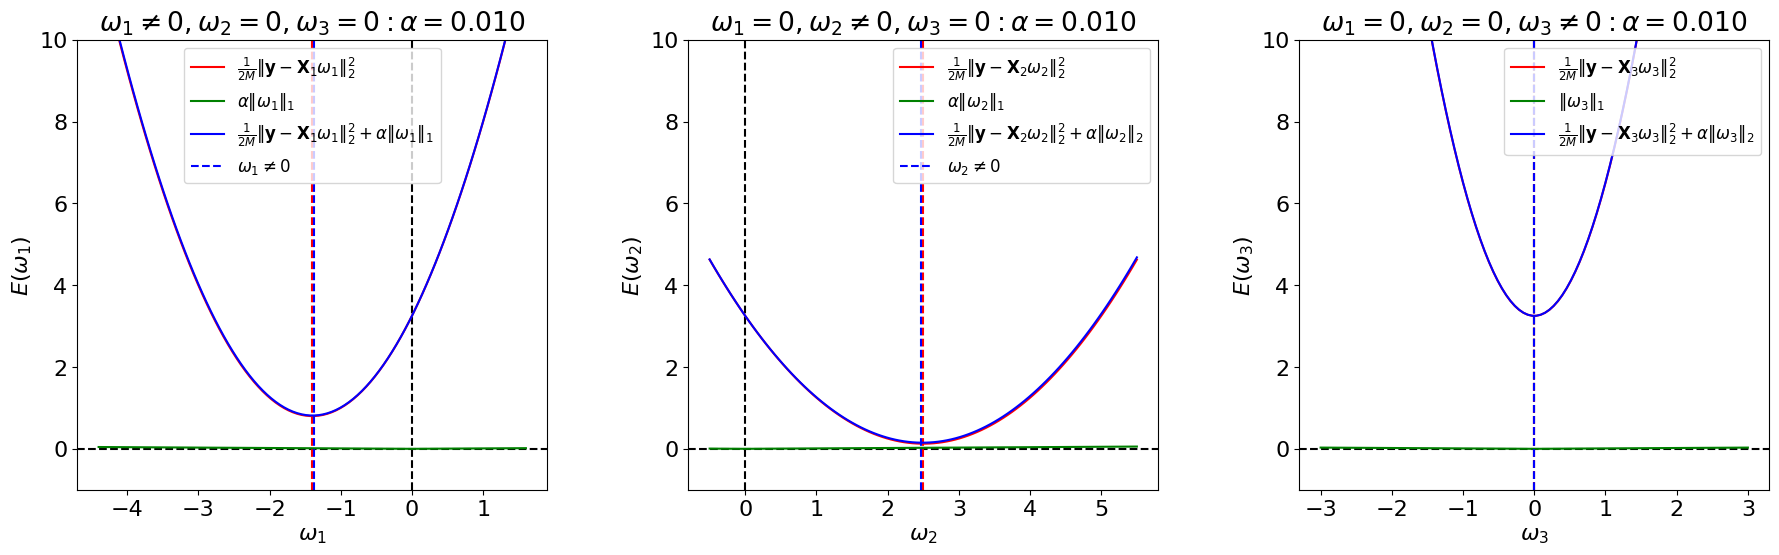

In [22]:
############################################
alphas = [ 10, 3.4, 2.2, 1.0, 0.1, 0.01 ]
#
for alpha in alphas:
  #
  alpha_str = '%05d' % (alpha*100)
  #

  fig = Grf_L0_1_case( alpha )
  #
  fig.savefig( FilePath + FileBaseName + '-alpha-%s.pdf' % alpha_str )